<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>LangChain-Based Data Science Assistant</center></font></h1>
<h1><center>Using the OpenAI API</center></h1>
<h3><center>Charlcye Mitchell, May 2024</center></h3>

# **GA-NLP Week 12 Final Project: LangChain Data Science Assistant**

## **Business Context**

Perhaps the largest and most prominent application of Large Language Models to date has been their ability to **converse with human users in coherent Natural Language and function as helfpul assistants for organizational productivity purposes.** As we know by now, a lot of work goes into creating and providing such Assistant-style LLMs to us as a service - the hugely compute-expensive Supervised Pre-training stage that's responsible for the vast majority of the LLM's world knowledge, the Instruction-style Supervised Fine-tuning stage on curated dialog datasets that adapts the LLM's behavior to that of a high-quality assistant, and the RLHF stage that teaches the LLM to provide responses that are aligned with human values. **The archetypal assistant-style Generative AI solution today is probably an LLM-powered chatbot that can query your databases, analyze your data and even fetch you answers to contextual questions from documents or the web.**

**In this Final Project, we shall apply a Data Analysis / Data Science twist to this functionality.** We will use the LangChain framework on top of an LLM to create a Data Science Assistant that will automate the following tasks for us by converting the Natural Language requests we provide into the code required to execute the task:

1. **Data Analysis**

2. **Data Science & Machine Learning Modeling**

3. **Relational Database Querying**

4. **Retrieval-Augmented Generation for Contextual Answers**

There are obvious reasons why such a project could be highly significant to business / research. By automating the code tasks common to various operations in Data Analysis, Data Science or Database Querying, such a solution has the potential to save significant time, improve code accuracy and also open up Data Analysis and Data Science to a more general audience that may not be familiar with the code involved.

From a broader perspective, the newfound ability of the best Large Language Models (beyond 1 billion parameters) to understand the true meaning of Natural Language commands and coherently respond to, acknowledge and fulfill them, has enabled us to usher in the next wave in the long list of automations that Computer Science has seen in its history. Translating commands into programming code, once solely the province of human developers, is now increasingly being automated by Generative AI, and we'll see many examples of the same in this project.


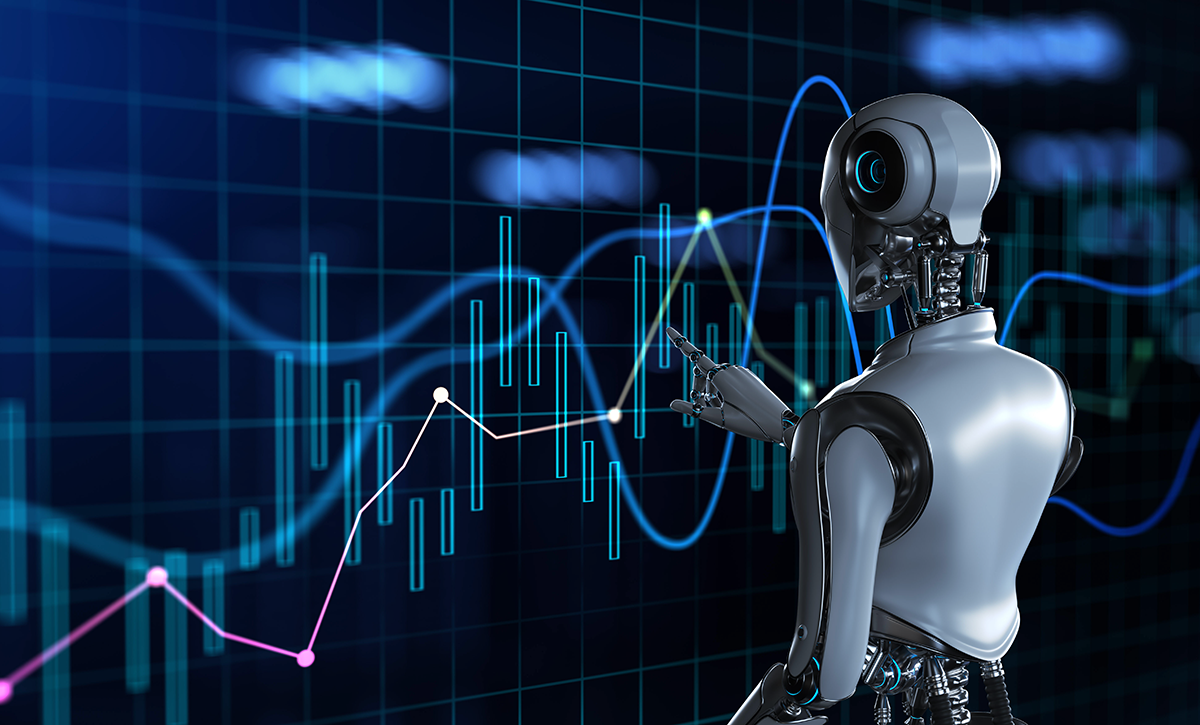

## **Project Objective**

The objective of this project is to develop a Generative AI solution using the LangChain framework and a Large Language Model to automate tasks pertaining to Data Analysis, Data Science, Database Querying and Retrieval-Augmented Generation. This will be broken down into several sub-tasks, each of which will automatically be performed by our Large Language Model purely by prompting it in the right direction.

## **I. Setting up the Environment (5 marks)**

### **Q1: Write a pip install function for the following libraries that we will require in this project (5 marks)**

### **openai, pandas, matplotlib, seaborn, cohere, tiktoken,**
### **langchain_experimental, pypdf, faiss-gpu, google-search-results**

In [44]:
# Use pip to install all dependencies here: openai, pandas, matplotlib, seaborn, cohere, tiktoken,langchain_experimental, pypdf, faiss-gpu, google-search-results
# You will need to use the specified versions of openai and langchain dependencies for the smooth working of the project as mentioned below:
# openai==1.7.1 langchain_experimental==0.0.49 langchain==0.1.0 langchain-core==0.1.10
!pip install openai==1.7.1
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install cohere
!pip install tiktoken
!pip install langchain==0.1.0
!pip install langchain-core==0.1.10
!pip install langchain-community==0.0.13
!pip install langchain_experimental==0.0.49
!pip install pypdf
!pip install faiss-gpu
!pip install google-search-results

### **Importing the libraries into the notebook**

In [45]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.llms import HuggingFaceHub
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.agents.agent_toolkits import create_conversational_retrieval_agent
from langchain.agents.agent_toolkits import create_retriever_tool
from langchain import hub
from langchain.schema.runnable import RunnablePassthrough
from langchain.agents import load_tools
import sqlite3

## **II. LLM Setup (5 marks)**

### **Q2.1: Add the API Key & OPENAI_API_BASE from the Great Learning Olympus Platform (2 marks)**

In [46]:
# Importing the GPT-4 LLM and setting it up
# https://platform.openai.com/docs/models/

# Retrieve the OpenAI API key from Colab user data
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')

# Set the API URL - This is not needed because I am using my own API key. This was for routing using the API proxy from Great Learning.
#openai_api_base = 'https://api.openai.com/v1'

# Set the environment variables for the OpenAI API key and base URL
os.environ['OPENAI_API_KEY'] = openai_api_key
#os.environ['OPENAI_API_BASE'] = openai_api_base - Not needed because I am using my own API key

### **Q2.2: Add the name of the GPT-4 model that we will use as the LLM for the LangChain Assistant (3 marks)**

In [47]:
# This is our LLM, the heart of the entire process. Here we are using the GPT-4 Model from OpenAi.
llm = ChatOpenAI(model_name='gpt-4-turbo')

## **Creating an EDA Agent**

**We shall first be initializing a Pandas Dataframe Agent below.**

*What is an agent?*
It can be thought of as an interface with a variety of tools chained together. First do this, then do that ...

These tools are defined by users as prompts to the LLM. Connecting an agent with a LLM simply brings these tools into the arsenal of the LLM, enabling it to use them.
The role of the user is to provide the LLM with the tools through prompts, while the LLM is responsible for deciding which tools it must use depending on the user input.

Another thing to observe is that there can be as many agents as tools that you might create. So, an agent could search the web, could fetch weather data, could perform calculations, or even do Machine Learning.

Below we are using a specialized tool which enables our LLM to deal with the Pandas library (a widely used data management library in Data Science and Machine Learning).

## **III. Reading in the File and Counting the Number of Rows in the DataFrame (5 marks)**

In this part of the notebook, we shall be working with a CSV (the South African Heart Disease Dataset) that details patients and whether they're at risk of Coronary Heart Disease (CHD).

### **Q3.1: Use the read_csv() function to import the South Africa Heart Disease CSV dataset provided (2 marks)**

In [48]:
# Importing the structured data.
df = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data')

### **Q3.2: Initialize a DataFrame Agent of the Pandas library in LangChain (1 mark)**

In [49]:
# Initializing the DataFrame agent of the Pandas library in LangChain allows our LLM to work with
# Pandas DataFrames with simple, natural language commands
agent = create_pandas_dataframe_agent(llm = llm,
                                      df = df,
                                      handle_parsing_errors=True,
                                      temperature=0,
                                      verbose = True);

Let's now start getting to know our data with some basic questions.

### **Q3.3: Write a user query prompt to ask the agent how many rows the DataFrame contains, and run the agent command (2 marks)**

In [50]:
# .invoke enables us to pass a query into the agent and see its output
text = 'How many rows are in my dataframe?'
agent.invoke(text)



> Entering new AgentExecutor chain...
Thought: To determine the number of rows in the dataframe `df`, we can use the `shape` attribute, which returns a tuple where the first element is the number of rows and the second is the number of columns.

Action: python_repl_ast
Action Input: df.shape
Observation: (462, 11)
Thought:I now know the final answer.

Final Answer: There are 462 rows in the dataframe `df`.

> Finished chain.


{'input': 'How many rows are in my dataframe?',
 'output': 'There are 462 rows in the dataframe `df`.'}

In the code above, we aim to store our question in the `text` variable.

Then we simply `run` the agent with this question.

What this does is, it forwards this question to our LLM, and lets it decide:

"for this user question give me a response. Use pandas if you have to"

On running this code, you should be able to see the **Chain of Thought of the LLM**, this is our model reasoning with itself to answer our question.

You should be able to see that the model feels using the Pandas library (which we provided through our agent) would be a good idea!

## **IV. Obtaining Simple Information about the DataFrame (5 marks)**

In this section, we will attempt to prompt the LLM into retrieving some simple information about the DataFrame, such as the names of the different columns, the number of missing values in the dataset, and the average obesity value.

### **Q4.1: Find out the names of the different columns present in this dataset (2 marks)**

In [51]:
text = 'What are the names of columns in the dataset?'
agent.invoke(text)



> Entering new AgentExecutor chain...
Thought: To get the names of the columns in the dataframe `df`, I can use the attribute `.columns`.

Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
Thought:I now know the final answer.

Final Answer: The names of the columns in the dataset are: 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'.

> Finished chain.


{'input': 'What are the names of columns in the dataset?',
 'output': "The names of the columns in the dataset are: 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'."}

### **Q4.2: Find out how many missing values are present in the dataset (1 mark)**

In [52]:
text = 'How many missing values are in the dataset?'
agent.invoke(text)



> Entering new AgentExecutor chain...
Thought: To find the number of missing values in the dataframe `df`, I can use the `isna()` method followed by `sum()` to count the missing values for each column. Then, I can sum up these values to get the total number of missing values in the dataset.

Action: python_repl_ast
Action Input: df.isna().sum().sum()
Observation: 0
Thought:I now know the final answer.

Final Answer: There are no missing values in the dataset.

> Finished chain.


{'input': 'How many missing values are in the dataset?',
 'output': 'There are no missing values in the dataset.'}

### **Q4.3: Compute the average obesity value (2 marks)**

In [53]:
text = 'What is the average obesity value?'
agent.invoke(text)



> Entering new AgentExecutor chain...
Thought: To find the average obesity value, I need to use the "obesity" column from the dataframe `df` and calculate its mean.

Action: python_repl_ast
Action Input: df['obesity'].mean()
Observation: 26.04411255411255
Thought:I now know the final answer based on the calculation of the mean of the obesity column.

Final Answer: The average obesity value in the dataframe is approximately 26.04.

> Finished chain.


{'input': 'What is the average obesity value?',
 'output': 'The average obesity value in the dataframe is approximately 26.04.'}

## **V. Obtaining a Brief Summary of the Columns in the Dataset (5 marks)**

### **Q5: Obtain a brief summary of the columns present in the dataset (5 marks)**

In [54]:
text = 'Provide a brief summary of the columns in the dataset.'
agent.invoke(text)



> Entering new AgentExecutor chain...
Thought: To provide a summary of the columns in the dataset, I need to use the `df.info()` function, which will give information about column names, non-null counts, and data types.

Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB

Thought:I now know the fina

{'input': 'Provide a brief summary of the columns in the dataset.',
 'output': 'The dataset contains 462 entries and 11 columns. The columns are as follows:\n1. **row.names** - Integer data type, 462 non-null entries.\n2. **sbp** - Integer data type, 462 non-null entries.\n3. **tobacco** - Floating-point data type, 462 non-null entries.\n4. **ldl** - Floating-point data type, 462 non-null entries.\n5. **adiposity** - Floating-point data type, 462 non-null entries.\n6. **famhist** - Object (string) data type, 462 non-null entries.\n7. **typea** - Integer data type, 462 non-null entries.\n8. **obesity** - Floating-point data type, 462 non-null entries.\n9. **alcohol** - Floating-point data type, 462 non-null entries.\n10. **age** - Integer data type, 462 non-null entries.\n11. **chd** - Integer data type, 462 non-null entries.'}

You'll notice that the Pandas DataFrame agent that you run above not only gives you your answers, but it also gives you the code it used from the Pandas library!

## **Getting the EDA Agent to perform Plotting**

Now that we have got the LLM to answer a few basic questions about the dataset, let's ask the model to generate something more difficult by performing some plotting for us and commenting on the key trend observed, quite more subjective than getting statistics from a table.

- Let us get the model to **generate a KDE plot** for us for to help us find the relation between obesity and risk of heart disease. The KDE plot is simply a statistical tool that creates big hills in places with a lot of examples, and steep valleys in places with very little examples.

- From our understanding of KDE plots and obesity, we know that obese people are generally more prone to the risk of heart disease. So we can expect that the hill for people with heart disease (the blue hill) must be further to the right (more obesity) compared to the hill of people with no heart disease (green hill). Let's see if this is what we get.

## **VI. Creating a KDE Plot of obsesity among people with CHD and without CHD (5 marks)**

### **Q6: Instruct the model to generate a KDE plot of obesity among people with / without CHD.**

### **Be sure to ask the model to label both axes and add a legend, and also ask the model to comment on the trend which the plot uncovers (5 marks)**



> Entering new AgentExecutor chain...
Thought: To generate a KDE plot of obesity among patients with and without CHD, I'll need to use a visualization library such as seaborn or matplotlib. First, I need to check if these libraries are available and import them. Additionally, I need to ensure the data is in an appropriate format for visualization.

Action: python_repl_ast
Action Input: import seaborn as sns; import matplotlib.pyplot as plt
Observation: 
Thought:The libraries seaborn and matplotlib are successfully imported. Next, I should proceed to generate the KDE plot using seaborn's `sns.kdeplot` function. I will plot two separate KDE curves on the same plot: one for patients with CHD (`chd=1`) and another for those without CHD (`chd=0`). I need to ensure that each curve is properly labeled and that axis labels and a legend are provided.

Action: python_repl_ast
Action Input: plt.figure(figsize=(8, 6)); sns.kdeplot(df[df['chd'] == 1]['obesity'], label='CHD Present', shade=True); 

<string>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



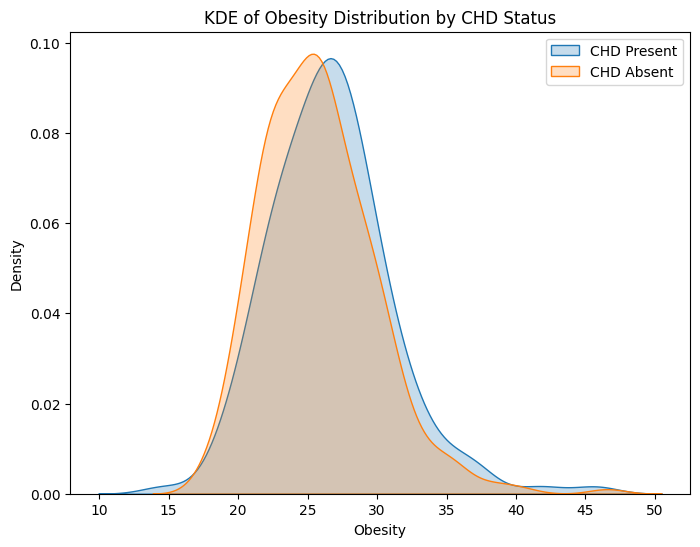


Observation: 
Thought:The KDE plot displays two curves representing the distribution of obesity among patients with and without CHD. The x-axis is labeled as "Obesity" and the y-axis as "Density". The legend differentiates the curves with labels "CHD Present" and "CHD Absent".

Final Answer: The KDE plot shows the distribution of obesity among patients with and without CHD. From the plot, we observe that both distributions have a similar shape, suggesting that obesity levels across patients are generally distributed similarly irrespective of their CHD status. However, slight differences in the distribution peaks and spread might exist, which could indicate variations in the central tendency and variability of obesity among these groups. Further statistical analysis would be required to ascertain the significance of these differences.

> Finished chain.


{'input': 'Generate a KDE plot of obesity among patients with and without CHD.        Label both axes of the graph.        Provide a legend.        Interpret the graph and comment in detail on the trends.',
 'output': 'The KDE plot shows the distribution of obesity among patients with and without CHD. From the plot, we observe that both distributions have a similar shape, suggesting that obesity levels across patients are generally distributed similarly irrespective of their CHD status. However, slight differences in the distribution peaks and spread might exist, which could indicate variations in the central tendency and variability of obesity among these groups. Further statistical analysis would be required to ascertain the significance of these differences.'}

In [55]:
# Here we will show the ability of the model to create a plot and comment on the underlying trend in the data
text = 'Generate a KDE plot of obesity among patients with and without CHD.\
        Label both axes of the graph.\
        Provide a legend.\
        Interpret the graph and comment in detail on the trends.'
agent.invoke(text)

## **VII. Creating a distribution of age of people with respect to CHD (5 marks)**

### **Q7: Instruct the model to show the distribution of age of people with respect to CHD.**

### **Ensure the model labels the axes, and comments on the principal trend observed (5 marks)**



> Entering new AgentExecutor chain...
Thought: To generate the KDE plot for the 'age' variable and distinguish between patients with and without CHD, I will use seaborn's `kdeplot` function. I will need to check if seaborn is already imported and import it if necessary.

Action: python_repl_ast
Action Input: import seaborn as sns
Observation: 
Thought:

Seaborn is now imported, and I can proceed to create the KDE plot for the variable 'age' based on the CHD status.

Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt; sns.kdeplot(data=df, x='age', hue='chd', fill=True); plt.xlabel('Age'); plt.ylabel('Density'); plt.title('KDE of Age by CHD Status'); plt.legend(title='CHD Status')
Observation: Legend
Thought:The KDE plot has been successfully created with appropriate labels and a legend. I will now interpret the graph based on the visualization.

Final Answer: The KDE plot displays the distribution of age for patients with and without Coronary Heart Disease (CHD). From the plot, we observe that:
- The distribution of age for patients with CHD (label 1) tends to be skewed towards older ages, indicating a higher prevalence of CHD among older individuals.
- The peak density for patients with CHD is at higher age values compared to those without CHD.
- In contrast, patients without CHD (label 0) show a broader spread in a

{'input': 'Generate a KDE plot for age of patients with and without CHD.        Label both axes of the graph.        Provide a legend.        Interpret the graph and comment in detail on the trends observed.',
 'output': 'The KDE plot displays the distribution of age for patients with and without Coronary Heart Disease (CHD). From the plot, we observe that:\n- The distribution of age for patients with CHD (label 1) tends to be skewed towards older ages, indicating a higher prevalence of CHD among older individuals.\n- The peak density for patients with CHD is at higher age values compared to those without CHD.\n- In contrast, patients without CHD (label 0) show a broader spread in age, with a slight skew towards younger ages, but still maintaining presence across all age ranges.\n- The overlap between the two distributions suggests that middle-aged individuals can fall into either category, but the risk of CHD increases with age.\n\nThis visualization helps in understanding how age is 

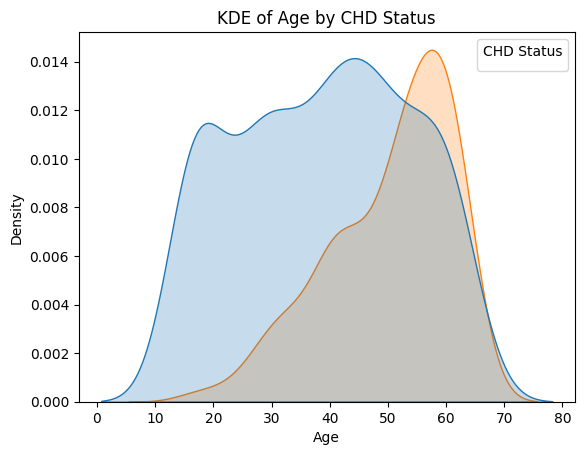

In [56]:
text = 'Generate a KDE plot for age of patients with and without CHD.\
        Label both axes of the graph.\
        Provide a legend.\
        Interpret the graph and comment in detail on the trends observed.'
agent.invoke(text)

Let us now try to see how the various factors contributing towards heart dieases are related to each other. We can do this by plotting a heatmap where the darker colored tiles would mean that the factors corresponding to the row and column position of that tile are more heavily correlated, and lighter colors would show a lighter correlation.

## **VIII. Creating a Pairwise Correlation Heatmap (5 marks)**

### **Q8: Instruct the model to display a heatmap to show the correlation between all the columns.**

### **Ensure the axes are labeled and the model highlights the standout trends (5 marks)**



> Entering new AgentExecutor chain...
Thought: To create a correlation heatmap, I first need to compute the correlation matrix of the dataframe `df`. Then, I will use seaborn to plot the heatmap, masking the upper half. I must ensure matplotlib's inline plotting is enabled.

Action: python_repl_ast
Action Input: import seaborn as sns; import matplotlib.pyplot as plt; df.corr()
Observation: ValueError: could not convert string to float: 'Present'
Thought:The error indicates that string values in 'famhist' column are causing the correlation calculation to fail because correlation computations require numeric data. I need to convert categorical data ('Present', 'Absent') in the 'famhist' column to numeric format, typically using binary encoding (1 for 'Present', 0 for 'Absent').

Action: python_repl_ast
Action Input: df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0}); df.corr()
Observation:            row.names       sbp   tobacco       ldl  adiposity   famhist  \
row.names 

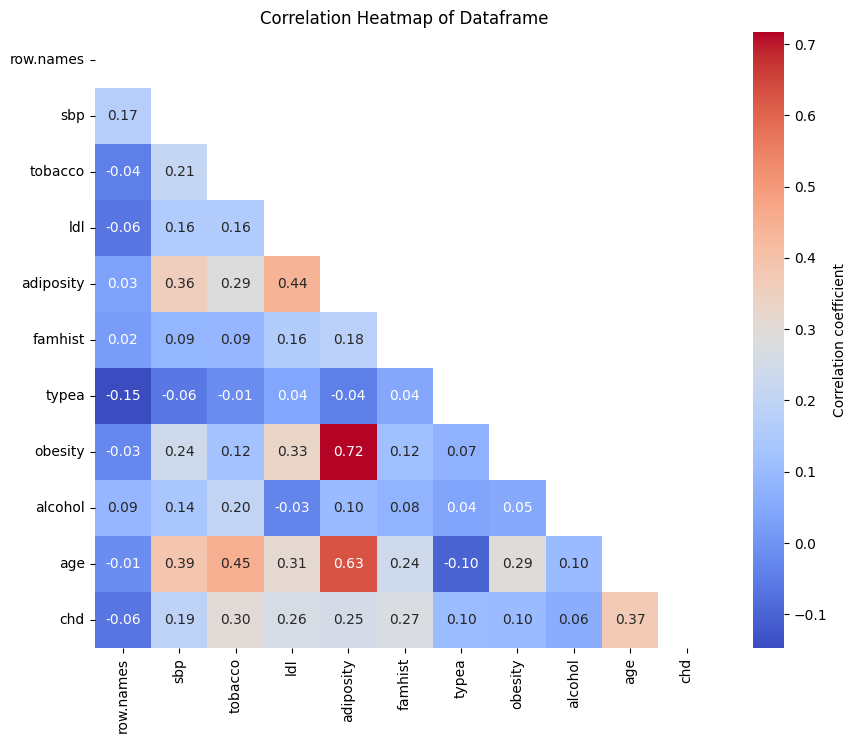


Observation: 
Thought:I now know the final answer
Final Answer: The correlation heatmap has been successfully plotted. Key observations include:
- High positive correlation between 'adiposity' and 'obesity' (0.72), indicating that as adiposity increases, obesity also tends to increase.
- Moderate positive correlation between 'age' and 'adiposity' (0.63), and 'age' and 'sbp' (0.39), showing that these factors tend to increase with age.
- A notable correlation between 'tobacco' and 'age' (0.45) and 'tobacco' and 'chd' (0.30) suggests that tobacco usage is associated with higher age and an increased risk of coronary heart disease.
- The 'famhist' (family history of heart disease) shows a moderate correlation with 'chd' (0.27), implying genetic factors might play a role in heart disease.
These correlations help in understanding relationships among different health indicators and outcomes in the dataset.

> Finished chain.


{'input': 'Plot a correlation heatmap inline, showing correlations among all the columns.        Mask the upper half of the heatmap.        Label the axes, provide a legend, and comment on the main trends.',
 'output': "The correlation heatmap has been successfully plotted. Key observations include:\n- High positive correlation between 'adiposity' and 'obesity' (0.72), indicating that as adiposity increases, obesity also tends to increase.\n- Moderate positive correlation between 'age' and 'adiposity' (0.63), and 'age' and 'sbp' (0.39), showing that these factors tend to increase with age.\n- A notable correlation between 'tobacco' and 'age' (0.45) and 'tobacco' and 'chd' (0.30) suggests that tobacco usage is associated with higher age and an increased risk of coronary heart disease.\n- The 'famhist' (family history of heart disease) shows a moderate correlation with 'chd' (0.27), implying genetic factors might play a role in heart disease.\nThese correlations help in understanding rel

In [57]:
text = 'Plot a correlation heatmap inline, showing correlations among all the columns.\
        Mask the upper half of the heatmap.\
        Label the axes, provide a legend, and comment on the main trends.'
agent.invoke(text)

Alright, so as we see, our model is quite good at plotting requests and finding the underlying trends.

Let's see if it can go to the next level and also test out hypothesese for us.

## **Hypothesis Testing**

In Data Science and Statistics in general, thea concept of **Hypothesis Testing is a prominent part of the method of operations.**

Hypothesis Testing is just a fancy term for **statistically fact-checking a quantitative claim.**

We pose a particular claim (an alternate hypothesis) and we pose a null claim (a claim which says that our hypothesis is useless). After this we take several examples and see whether they follow our claim or not with a degree of assurance so that those results could not have occurred by chance.

In the example below, we follow the following structure:

**Claim:** Obesity increases the risk of heart disease

Now we would use the following steps:
- On average, what is the obsesity level of people with heart disease and without heart disease ?
- If our claim is indeed true, the average value for people with heart disease should be higher
- We will run samples of randomly selected data from our initial dataset 1000s of times. We will then see what the distribution of the averages looks like.
- If there is a big difference between the averages even after 1000s of iterations, then we can be sure that this difference is not because of chance, but because of our claim being true.

## **IX. Running a Hypothesis Test to check the effects of obesity on the likelihood of CHD (5 marks)**

### **Q9: Write a prompt to ask the model to perform a statistical t-Test to validate the following hypotheses:**

### **Null Hypothesis:** Higher levels of obesity do not increase the risk of CHD.

### **Alternate Hypothesis:** Higher levels of obesity increase the risk of CHD. **(5 marks)**

In [58]:
# Let's use a t-value Hypothesis Test to check whether obesity affects the chances of CHD
text = 'Validate the following hypothesis using a T-test.\
        Null Hypothesis: Higher levels of obesity do not increase the risk of CHD.\
        Alternate Hypothesis: Higher levels of obesity increase the risk of CHD.\
        Clearly state the conclusion.'
agent.invoke(text)



> Entering new AgentExecutor chain...
Thought: To validate the hypothesis using a T-test, I need to compare the mean levels of obesity between individuals with CHD and those without CHD. First, I will separate the `obesity` values into two groups based on the `chd` status.

Action: python_repl_ast
Action Input: df.groupby('chd')['obesity'].mean()
Observation: chd
0    25.737450
1    26.622937
Name: obesity, dtype: float64
Thought:The mean obesity levels for individuals with CHD (1) is 26.622937, and for those without CHD (0) is 25.737450. Next, I need to perform a T-test to statistically evaluate if this difference is significant. I will use the `ttest_ind` function from the `scipy.stats` module, which compares the means of two independent samples.

Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind; ttest_ind(df[df['chd'] == 1]['obesity'], df[df['chd'] == 0]['obesity'])
Observation: TtestResult(statistic=2.1576361103096544, pvalue=0.031473168047041325, df=460.0)

{'input': 'Validate the following hypothesis using a T-test.        Null Hypothesis: Higher levels of obesity do not increase the risk of CHD.        Alternate Hypothesis: Higher levels of obesity increase the risk of CHD.        Clearly state the conclusion.',
 'output': 'The analysis supports the alternate hypothesis that higher levels of obesity increase the risk of CHD, as the p-value (0.03147) is less than 0.05. This indicates that the null hypothesis can be rejected. Higher obesity levels are associated with an increased risk of CHD.'}

## **Machine Learning Modeling using LLMs**

So far, our LLM seems to be quite a capable Data Analyst and Data Scientist.

Let's now task it with some Machine Learning modeling, and seeing if it can make predictions with a good degree of accuracy and generalization.

- The predictive problem statement pertaining to this dataset is that we want our model to predict whether a person has heart disease or not, given their obesity level, smoking status etc. (all the other columns from our data set).
- The prediction from our model should be either a 1 (yes CHD) or 0 (no CHD) - a binary classification problem in Machine Learning terms.
- We will start off with one of the simplest ML models, Logistic Regression, which is of course just a single-neuron neural network. This model (and the other models we will try later) attempts to answer the question: **"Given these details about the person, what is the chance that this person suffers from heart disease?"**

## **X. Building a Logistic Regression Model (5 marks)**

### **Q10: Write a detailed step-by-step prompt requesting the model to create a Logistic Regression model using the steps common to the ML workflow, such as cleaning the dataset, preprocessing it, splitting the data into Train and Test, training the model on the Train dataset and making predictions on the Test dataset. The model should print out the accuracy score it obtains on the Test dataset. (5 marks)**
  



> Entering new AgentExecutor chain...
Thought: First, we need to check for null values in the dataset to address step 1 (clean the dataset).

Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:The dataset contains no null values in any of its columns, which means step 1 (cleaning the dataset for null values) is already satisfied.

Next, to prepare the dataset for logistic regression (step 2), I will encode the categorical variable 'famhist' into a numeric format suitable for the model.

Action: python_repl_ast
Action Input: df['famhist'].value_counts()
Observation: KeyError: 'famhist'
Thought:It appears there was an error in referencing the column 'famhist', possibly due to a typo or incorrect column name. I need to confirm the column names to ensure we're working with the correct one.

Action: pyt

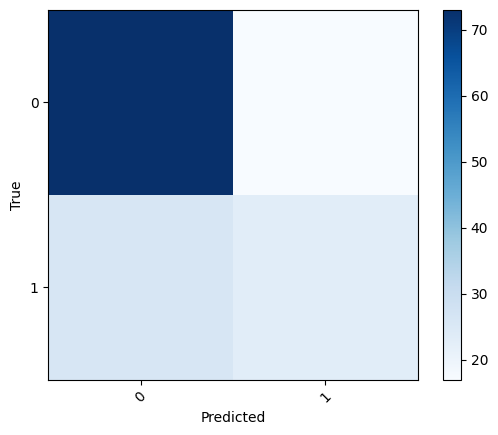


Observation: 
Thought:The confusion matrix has been plotted successfully, which visually represents the true positives, true negatives, false positives, and false negatives. I will now retrieve the accuracy score to evaluate the performance of the model quantitatively.

Action: python_repl_ast
Action Input: accuracy_score(y_test, y_pred)
Observation: 0.6906474820143885
Thought:The accuracy score of the Logistic Regression model on the testing set is approximately 69.06%. This indicates that the model correctly predicts the outcome for about 69.06% of the cases in the test set. While this is a decent accuracy, it also suggests that there is room for improvement. The model might benefit from parameter tuning, feature engineering, or using more advanced modeling techniques. Additionally, the balance between sensitivity (true positive rate) and specificity (true negative rate) should be considered, especially in medical or health-related predictions where the cost of false negatives might

{'input': 'Follow these steps to run a Logistic Regression model to predict the CHD variable:                       1. Clean the dataset so it has no null values.                       2. Preprocess the dataset so it is ready for use by a Logistic Regression model.                       3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps:                       3a. Split the data into Train and Test sets. Use a 70/30 split. These datasets should not contain the Outcome column.                       3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.                       3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.                       3d. Plot the Confusion Matrix inline.                       3e.  Print the accuracy score between binary y_pred and y_test, and comment in detail on the predictive performance of the m

In [70]:
fixed_model_prompt = 'Follow these steps to run a Logistic Regression model to predict the CHD variable: \
                      1. Clean the dataset so it has no null values. \
                      2. Preprocess the dataset so it is ready for use by a Logistic Regression model. \
                      3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps: \
                      3a. Split the data into Train and Test sets. Use a 70/30 split. These datasets should not contain the Outcome column. \
                      3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that. \
                      3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values. \
                      3d. Plot the Confusion Matrix inline. \
                      3e.  Print the accuracy score between binary y_pred and y_test, and comment in detail on the predictive performance of the model. \ '

agent.invoke(fixed_model_prompt)

Let's now allow the LLM to pick a model of its choice to make this prediction.

## **XI. Binary Classification with an ML Model of the LLM's Choice (5 marks)**

### **Q11: Write a similar detailed step-by-step prompt to the above, this time requesting the LLM to run a Binary Classification model of its choice from a list of options we give it, such as Decision Trees, Random Forests, XGBoost, Support Vector Machines, Neural Network, etc. The LLM has to provide reasoning for why it picked this model. Otherwise, the rest of the steps can be similar to the prompt drafted for the earlier question. (5 marks)**



> Entering new AgentExecutor chain...
Thought: The first step is to check if the dataset contains any null values that need cleaning.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names      0
sbp            0
tobacco        0
ldl            0
adiposity      0
famhist      462
typea          0
obesity        0
alcohol        0
age            0
chd            0
dtype: int64
Thought:The dataset has null values in the 'famhist' column, which need to be addressed before moving on to preprocessing and model training.
Action: python_repl_ast
Action Input: df['famhist'].fillna('Unknown', inplace=True)
Observation: 
Thought:The null values in the 'famhist' column have been addressed by filling them with 'Unknown'. Now, the dataset should be free of null values. I will verify this by checking again for any remaining null values.

Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity

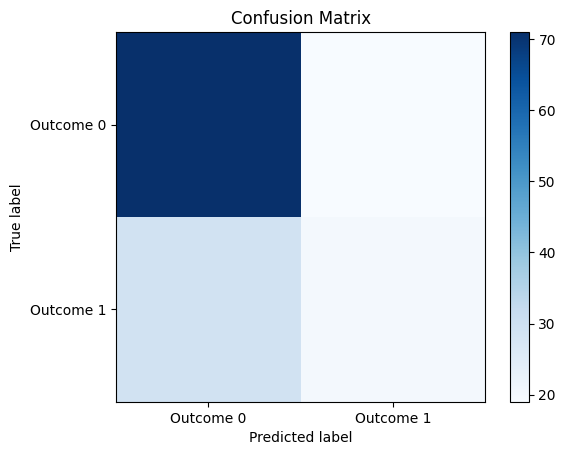


Observation: 
Thought:The confusion matrix has been plotted, showing the counts of true positives, true negatives, false positives, and false negatives. This visualization helps in understanding the model's classification accuracy visually. Next, I will obtain the accuracy score to quantify the model's performance.

Action: python_repl_ast
Action Input: accuracy = accuracy_score(y_test, y_pred); print(accuracy)
Observation: 0.6546762589928058

Thought:I now know the final answer.
Final Answer: The Random Forest model was selected for its robustness and effectiveness in handling both non-linear relationships and feature interactions, which is suitable for the given dataset. The model was trained with 25 estimators and used to predict whether individuals have coronary heart disease (CHD), with the predictions converted to binary outcomes based on a threshold of 0.5. The performance of the model was evaluated using a confusion matrix and an accuracy score.

The accuracy score of the mode

{'input': 'Follow these steps to run a binary classification model to predict the CHD variable:                          1. Clean the dataset so it has no null values.                          2. Preprocess the dataset so it is ready for use by your selected model.                          3. Select the best model from only the following choices: Decision Tree, Random Forest, XGBoost, Support Vector Machine, or Neural Network.                          4. Run the selected model to classify people into Outcome 1 or Outcome 0 with the following steps:                          4a. Split the data into Train and Test sets. Use a 70/30 split. These datasets should not contain the Outcome column.                          4b. Train the model on the Train dataset with 25 estimators.                          4c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.                          4d. Plot the Confusion Matrix inline.                          4e.

In [60]:
variable_model_prompt = 'Follow these steps to run a binary classification model to predict the CHD variable: \
                         1. Clean the dataset so it has no null values. \
                         2. Preprocess the dataset so it is ready for use by your selected model. \
                         3. Select the best model from only the following choices: Decision Tree, Random Forest, XGBoost, Support Vector Machine, or Neural Network. \
                         4. Run the selected model to classify people into Outcome 1 or Outcome 0 with the following steps: \
                         4a. Split the data into Train and Test sets. Use a 70/30 split. These datasets should not contain the Outcome column. \
                         4b. Train the model on the Train dataset with 25 estimators. \
                         4c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values. \
                         4d. Plot the Confusion Matrix inline. \
                         4e.  Print the accuracy score between binary y_pred and y_test. \
                         5. Explain your reasoning to select the model you executed. \
                         6. Comment on the predictive performance of the model.'

agent.invoke(variable_model_prompt)

Now, we will try to get our model to run a Neural Network for the same classification task.

## **XII. Binary Classification with a Neural Network (5 marks)**

### **Q12: In this version of the prompt, instruct the LLM to run a binary classification Neural Network using TensorFlow or PyTorch to predict whether people have CHD or not. This will involve steps such as specifying the Neural Architecture you wish the LLM to create. (5 marks)**



> Entering new AgentExecutor chain...
Thought: To start, I need to ensure the dataframe `df` has no null values and is clean.

Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:The dataset `df` has no null values in any of the columns, so it is clean and ready for preprocessing.

Next, I need to preprocess the data for neural network input. This involves encoding categorical variables and scaling numerical features.

Action: python_repl_ast
Action Input: df['famhist'].value_counts()
Observation: KeyError: 'famhist'
Thought:It seems there was an error accessing the 'famhist' column. Let's verify the column names of the dataframe to ensure that 'famhist' is included and check for possible typos.

Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl

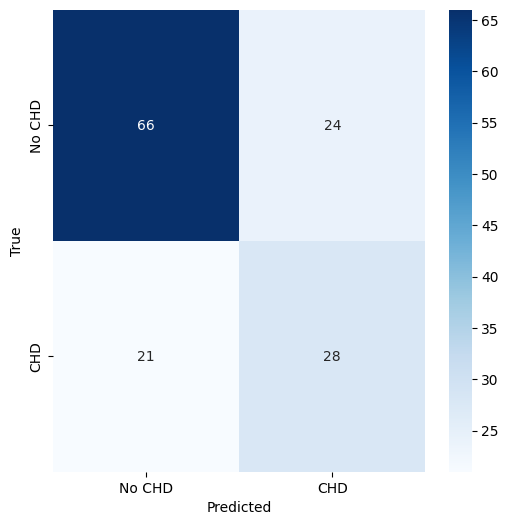


Observation: Accuracy: 0.6762589928057554

Thought:The predictive performance of the model resulted in an accuracy of approximately 67.63%. This level of accuracy indicates a moderate performance, suggesting that the model can correctly predict the occurrence of CHD in about two-thirds of cases. The confusion matrix displayed would provide further insights into the number of true positives, true negatives, false positives, and false negatives, helping to understand the model's specificity and sensitivity.

Final Answer: The predictive performance of the neural network model on the CHD dataset resulted in an accuracy of approximately 67.63%, indicating a moderate level of effectiveness in predicting the occurrence of CHD.

> Finished chain.


{'input': 'Follow these steps to run a binary classification neural network model to predict the CHD variable:                   1. Clean the dataset so it has no null values.                   2. Preprocess the dataset so it is ready for use by your selected model.                   3. Define a multi-layer neural network with an input layer, 3 64 neuron hidden layers, and an output layer for binary classification.                   3a.  Add a 0.2 dropout layer after the second hidden layer.                   3b.  Use ReLU activation for the hidden layers, and sigmoid for the output layer.                   3c.  Use a tensorflow framework to run this model.                   4. Run the selected model to classify people into Outcome 1 or Outcome 0 with the following steps:                   4a. Split the data into Train and Test sets. Use a 70/30 split. These datasets should not contain the Outcome column.                   4b. Train the model on the Train dataset with 50 epochs. Use a 

In [61]:
# Remember to be as precise in your instructions as possible. This just helps to reduce the probability of the
# model mis-interpreting our commands

nn_model_prompt = 'Follow these steps to run a binary classification neural network model to predict the CHD variable:\
                   1. Clean the dataset so it has no null values.\
                   2. Preprocess the dataset so it is ready for use by your selected model.\
                   3. Define a multi-layer neural network with an input layer, 3 64 neuron hidden layers, and an output layer for binary classification.\
                   3a.  Add a 0.2 dropout layer after the second hidden layer.\
                   3b.  Use ReLU activation for the hidden layers, and sigmoid for the output layer.\
                   3c.  Use a tensorflow framework to run this model.\
                   4. Run the selected model to classify people into Outcome 1 or Outcome 0 with the following steps:\
                   4a. Split the data into Train and Test sets. Use a 70/30 split. These datasets should not contain the Outcome column.\
                   4b. Train the model on the Train dataset with 50 epochs. Use a verbosity level of 0.\
                   4c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
                   4d. Plot the Confusion Matrix inline.\
                   4e.  Print the accuracy score between binary y_pred and y_test.\
                   5. Comment on the predictive performance of the model.'

agent.invoke(nn_model_prompt)

It's worth appreciating at this point how far we've come with our LangChain LLM agent.

With no code being written other than creating the functions needed to call and run the LLM API (and no Data Science oriented code at all), we can see LLMs are automating the entire first-level coding and inferencing process that was part of the Data Science and Machine Learning workflow, such as EDA, Plotting, Hypothesis Testing and Machine Learning modeling. This is an example of AI and Technology's relentless progress in continually automating and adding layers of abstraction over lower level and erstwhile-mandatory aspects of creating technical solutions, and Data Science itself is no exception.

Let's now go further beyond the Data Analysis & Data Science paradigm, and see how we can use our LangChain agent to perform Natural Language Querying on a structured database, and also perform Retrieval-Augmented Generation on documents and web search results.

## **XIII. Database Natural Language Querying (10 marks)**

In this section, we will focus on creating a new agent with our LLM.

This agent will carry out 2 main tasks for us:

- **Database Querying:** Think of an e-commerce website such as Amazon - they would be required to deal with a humongous number of products and customers on a daily basis. They likely store all this information in a large database - and being able to query and retrieve relevant information from that database is critical for their operations to work. This is done through queries and requests, SQL queries in particular for relational databases. We shall now ask our agent to do this for us on a toy dataset.

- **Math:** Secondly, we will also equip our agent with another tool - math. Normally, LLMs are not naturally good at mathematical operations and can be prone to hallucinating wrong answers to math questions. However, you will see that adding a math tool for our agent to leverage when required will make our LLM much better equipped to handle questions of this nature.

First, we'll import the sub-packages we need:

In [62]:
from langchain.agents import *
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline

In the following code block, we will be creating a toy SQL database using SQLite for demonstration purposes.

In [63]:
# Creating a dummy SQL database for our example.
conn = sqlite3.connect('sample.db')

# Creating a cursor object to interact with the database
cursor = conn.cursor()

# Creating a table to store employee information
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employees (
        EmployeeID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Birthdate DATE,
        Department TEXT,
        Salary REAL
    )
''')

# Inserting some sample data into the Employees table
cursor.executemany('''
    INSERT INTO Employees (FirstName, LastName, Birthdate, Department, Salary)
    VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', '1990-05-15', 'HR', 50000.00),
    ('Jane', 'Smith', '1985-12-10', 'Sales', 55000.00),
    ('Bob', 'Johnson', '1992-08-25', 'Engineering', 60000.00),
    ('Alice', 'Brown', '1988-04-03', 'Marketing', 52000.00)
])

# Commiting the changes and close the connection
conn.commit()
conn.close()

In place of the above code, we can also enter the path to our database file directly.

In [64]:
# In place of file, you can enter the path to your database file
file = "sample.db"
db = SQLDatabase.from_uri(f"sqlite:///{file}")

Now let's create our Database Agent and equip it with the LLM math tool.

In [65]:
tools = ['llm-math']

In [66]:
tools = load_tools(tools,llm)

In [67]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)
db_agent = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    tools=tools,
    verbose=True
)

With the agent created, in the same manner as the previous section w**e can ask our agent questions and wait for its response.**

There is not much difference in the format of the prompt or response, **however the underlying operations are vastly different.**

### **Q13.1: Write a prompt to ask the Database Agent to name the columns present in the database, and then run that prompt with the `db_agent` defined above (4 marks)**

In [68]:
# Naming the columns present in the database
prompt = 'What are the names of the columns present in the database?'
db_agent.invoke(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: 
Observation: Employees
Thought:Since I know the tables in the database, I should now look at the schema of the table.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:I now know the final answer
Final Answer: The columns present in the "Employees" table are: EmployeeID, FirstName, LastName, Birthdate, Department, and Salary.

> Finished chain.


{'input': 'What are the names of the columns present in the database?',
 'output': 'The columns present in the "Employees" table are: EmployeeID, FirstName, LastName, Birthdate, Department, and Salary.'}

### **Q13.2: Write a prompt to ask the Database Agent what was the maximum salary paid to an employee, and to whom it was paid (3 marks)**

In [71]:
# Retrieving the maximum salary and who received it
prompt = 'What was the maximum salary paid, and who was it paid to?'
db_agent.invoke(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: 
Observation: Employees
Thought:The 'Employees' table seems the most relevant for salary information. I should now check the schema to ensure the correct columns for querying maximum salary and employee name.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The table schema shows that the 'Employees' table includes columns for 'FirstName', 'LastName', and 'Salary', which are relevant for finding out who was paid the maximum salary. I should formulate a SQL query to find the maximum salary along with the cor

{'input': 'What was the maximum salary paid, and who was it paid to?',
 'output': 'The maximum salary paid was 60,000.0, and it was paid to Bob Johnson.'}

Let's now give the agent a chance to use its math tool with an arithmetic question.

### **Q13.3: Write a prompt to ask the Database Agent to compute the square root of the maximum salary paid to an employee (3 marks)**

In [72]:
# Let's see if our LLM is profecient at arithemtic with the help of its math tool
prompt = 'Calculate the square root of the maximum salary paid to an individual employee'
db_agent.invoke(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: 
Observation: Employees
Thought:The database contains a table named "Employees." I need to check the schema of this table to determine which column holds salary information.

Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The "Employees" table has a "Salary" column which holds the salary information. I will now write and check a query to find the maximum salary and then calculate its square root.

Action: sql_db_query_checker
Action Input: SELECT MAX(Salary) FROM Employees
Observation: SELECT MAX(Salary) 

{'input': 'Calculate the square root of the maximum salary paid to an individual employee',
 'output': 'The square root of the maximum salary paid to an individual employee is approximately 244.949.'}

## **XIV. Retrieval-Augmented Generation (10 marks)**

**In this section, we will perform Retrieval-Augmented Generation (RAG) with a LangChain agent.** As we know, RAG refers to the process of supplementing the context of an LLM from the System Prompt and User Query, with additional chunks of text that may have been retrieved from external sources such as a Document or the results of a Web Search. This additional context is used by the LLM to generate what usually turns out to be a much more contextual and relevant answer to the User Query, especially when that query refers to current news or specific facts or figures that may not have been present in the LLM's original pre-training dataset. **The benefits of augmenting an LLM's capability with RAG are numerous**, such as providing it with additional knowledge, reducing its risk of hallucination, and being able to now fact-check the LLM by monitoring the sources from which it has generated its answer.

- What we shall do here is, we shall first load our document, split it into easy to handle chunks, and then vectorize and store these chunks in a Vector Database
- We provide our RAG Agent with this Vector Database and a few more tools
- Whenever we ask the agent a question, it will refer to the document to find something from the database which could answer our question
- So if you asked it to summarise a chapter from the book, the agent would first fetch the specific chapter from the database and then summarise it with the LLM

Let's now see the agent in action.

In [73]:
from langchain.agents.agent_toolkits import create_retriever_tool

We shall import a chapter from an Operating Systems course book.

In [74]:
# Let's create an object to load the book
Loader = PyPDFLoader('https://pages.cs.wisc.edu/~remzi/OSTEP/cpu-intro.pdf')

Next, we shall load the document and split it into several chunks, each of size 1000 and with an overlap of 50 between chunks.

In [75]:
# We use the loader created above to load the document
documents = Loader.load()

# We split the document into several chunks as mentioned above
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

Let's vectorize these chunks into vector embeddings, and store them in the FAISS Vector Database.

In [76]:
# Now we transform these chunks into the list of number called vectors and store them into our database
embeddings = OpenAIEmbeddings()
db = FAISS.from_documents(texts, embeddings)

Now, we create a Retriever instance that will perform similarity search and extract those vector chunks relevant to the user query.

In [77]:
# We create a retreiver instance. Its job is to fetch for us a vector (portion of the document) relevant to the user
# question
retriever = db.as_retriever()

Finally, we shall write the prompt to create the RAG agent.

In [78]:
# This is the prompt to create a RAG agent for us
retriever_name = "search_the_text_of_pdf"
retriever_desc = """The purpose of this tool is to answer questions based on the book: 'Operating Systems 3 \
easy pieces' regarding operating systems in computer science. Answer any query input by the user from the vectorbase\
if you do not know the answer, then use the serpapi tool to search the web for the answer. Clearly state that you\
searched the web. Keep your answers short and precise."""

We are defining tool below:

**RAG Tool:** This is the tool that performs RAG for us on the loaded document. It needs access to the retreiver object that we created above to fetch relevant pieces from our database to answer our questions.

In [79]:
rag_tool = create_retriever_tool(
    retriever,
    retriever_name,
    retriever_desc
)
tools = [rag_tool] # we can have multiple tools, hence the list

In [80]:
RAG_executor = create_conversational_retrieval_agent(llm=llm, tools=tools, verbose=True) # setting verbose=True to output the thought process of the agent

Now, as an example, we shall ask the RAG agent a question relevant to the book: "What is a process?"

The model correctly calls the search_document tool to fetch us the answer to our question.

In [81]:
question = "what is a process"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'what is a process'}`


[Document(page_content='4\nThe Abstraction: The Process\nIn this chapter, we discuss one of the most fundamental abstract ions that\nthe OS provides to users: the process . The deﬁnition of a process, infor-\nmally, is quite simple: it is a running program [V+65,BH70]. The program\nitself is a lifeless thing: it just sits there on the disk, a bun ch of instructions\n(and maybe some static data), waiting to spring into action. It is the oper-\nating system that takes these bytes and gets them running, tr ansforming\nthe program into something useful.\nIt turns out that one often wants to run more than one program at\nonce; for example, consider your desktop or laptop where you might lik e\nto run a web browser, mail program, a game, a music player, and so forth.\nIn fact, a typical system may be seemingly running tens or even hundreds\nof processes at the same time. Doing 

### **Q15.1: Repeat the above code flow to ask the agent "What are the different states of a process?" (4 marks)**

In [82]:
question = 'What are the different states of a process?'
user_query = {"input": question }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'different states of a process'}`


[Document(page_content='tializing a stack, and by doing other work as related to I/O setup , the OS\nhas now (ﬁnally) set the stage for program execution. It thus has on e last\ntask: to start the program running at the entry point, namely main() . By\njumping to the main() routine (through a specialized mechanism that\nwe will discuss next chapter), the OS transfers control of the CP U to the\nnewly-created process, and thus the program begins its execut ion.\n4.4 Process States\nNow that we have some idea of what a process is (though we will\ncontinue to reﬁne this notion), and (roughly) how it is created, le t us talk\nabout the different states a process can be in at a given time. The notion\nthat a process can be in one of these states arose in early computer s ystems\n[DV66,V+65]. In a simpliﬁed view, a process can be in one of three states:\n•Running : 

### **Q15.2: Repeat the above code flow to ask the agent "Explain data structures as mentioned in the pdf?" (3 marks)**

In [83]:
question = 'Explain data structures as mentioned in the pdf?'
user_query = {"input": question }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'data structures'}`


[Document(page_content='Note that there are many decisions the OS must make, even in this\nsimple example. First, the system had to decide to run Process 1while\nProcess 0issued an I/O; doing so improves resource utilization by keep-\ning the CPU busy. Second, the system decided not to switch back to\nProcess 0when its I/O completed; it is not clear if this is a good deci-\nsion or not. What do you think? These types of decisions are made by th e\nOSscheduler , a topic we will discuss a few chapters in the future.\n4.5 Data Structures\nThe OS is a program, and like any program, it has some key data stru c-\ntures that track various relevant pieces of information. To trac k the state\nof each process, for example, the OS likely will keep some kind of pro-\ncess list for all processes that are ready and some additional informa-\ntion to track which process is currently runnin

### **Q15.3: Repeat the above code flow to ask the agent "What is Process API?" (3 marks)**

In [84]:
question = 'What is Process API?'
user_query = {"input": question }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'Process API'}`


[Document(page_content='10 T HEABSTRACTION : THEPROCESS\nASIDE : KEYPROCESS TERMS\n• The process is the major OS abstraction of a running program. At\nany point in time, the process can be described by its state: the con-\ntents of memory in its address space , the contents of CPU registers\n(including the program counter and stack pointer , among others),\nand information about I/O (such as open ﬁles which can be read or\nwritten).\n• The process API consists of calls programs can make related to pro-\ncesses. Typically, this includes creation, destruction, and other use-\nful calls.\n• Processes exist in one of many different process states , including\nrunning, ready to run, and blocked. Different events (e.g., g etting\nscheduled or descheduled, or waiting for an I/O to complete) tran -\nsition a process from one of these states to the other.\n• A process list contains info

This concludes our simple demonstration of the various capabilities of LangChain Agent Assistants through this Final Project notebook.

## **XV. Conclusions and Recommendations (20 marks)**


### **Q15: What are your conclusions from the exercise of utilizing LangChain Agents as Data Science Assistants or Retriever Assistants in this manner? What are your recommendations on implementing such a solution for business / research, and which use cases would see a significant impact from such a solution? (20 marks)**

#### Conclusions

*   **Enhanced Productivity:** LangChain Agents can significantly reduce the time and effort required for data gathering and initial analysis, thereby increasing the productivity of data scientists and researchers.
*   **Improved Access to Information:** These agents excel in fetching and summarizing relevant information, making them invaluable for comprehensive literature reviews or data retrieval tasks.
*   **Augmented Decision-Making:** By providing quick access to data and insights, these agents can aid in more informed decision-making, which is critical in both business and research settings.
*   **Customizable Workflows:** LangChain's flexibility allows it to be tailored to specific workflows, making it a versatile tool that can be adapted to various needs and integration points.

#### Recommendations
*   **Integration with Existing Systems:** To maximize utility, integrate LangChain Agents into existing data management systems to streamline workflows and enhance user interaction.
Training on Domain-Specific Data: Customize the underlying models with domain-specific data to improve the relevance and accuracy of the information retrieved.
*   **Iterative Development:** Start with small, well-defined use cases to refine the agents' capabilities before scaling up to more complex scenarios.
*   **Ethical and Privacy Considerations:** Implement robust data handling and privacy measures to ensure that the use of such technology aligns with ethical standards, especially when dealing with sensitive information.

#### Impactful Use Cases
*   **Market Research:** LangChain can automate the collection and analysis of market trends, competitor activities, and consumer behavior, providing businesses with actionable insights more rapidly.
*   **Academic Research:** In academia, these agents can expedite the literature review process, identify research gaps, and even suggest potential methodologies or experiments based on existing work.
*   **Healthcare:** In healthcare, LangChain could assist in retrieving patient histories, research papers, and treatment protocols quickly, aiding in diagnosis and treatment planning.
*   **Legal and Compliance:** For legal professionals, an agent could quickly pull relevant case law, precedents, and regulatory information, reducing the time spent on these tasks.

Overall, LangChain Agents have the potential to significantly impact how information is retrieved and utilized in business and research. By automating routine tasks and providing quick access to needed data, these agents not only save time but also enable deeper, more focused analysis and innovation.